In [1]:
import matplotlib.pyplot as plt
import numpy as np
import neurobiases

from importlib import reload
from neurobiases import TriangularModel, utils
from scipy.linalg import svd
%matplotlib inline

# Basis functions tuning formulation

## Plot basis functions

In [2]:
tuning_kwargs, coupling_kwargs, noise_kwargs, stim_kwargs = \
    TriangularModel.generate_kwargs(
        M=20, N=23, K=4,
        tuning_sparsity=0.6, coupling_sparsity=0.5,
        tuning_random_state=2332, coupling_random_state=2332)

In [3]:
tm = TriangularModel(
    model='linear',
    parameter_design='basis_functions',
    tuning_kwargs=tuning_kwargs,
    coupling_kwargs=coupling_kwargs,
    noise_kwargs=noise_kwargs,
    stim_kwargs=stim_kwargs)

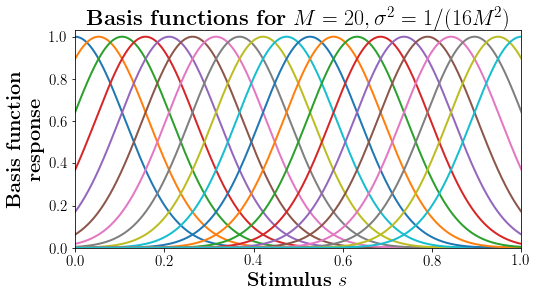

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
stimuli = np.linspace(0, 1, 1000)
basis_functions = utils.calculate_tuning_features(stimuli, tm.bf_centers, tm.bf_scale)

for idx in range(tm.M):
    ax.plot(stimuli, basis_functions[:, idx], linewidth=2)
    
ax.tick_params(labelsize=15)
ax.set_xlim([0, 1])
ax.set_xlabel(r'\textbf{Stimulus} $s$', fontsize=20)
ax.set_ylim([0, 1.03])
ax.set_ylabel(r'\textbf{Basis function}' '\n'r'\textbf{response}', fontsize=20)
ax.set_title(r'\textbf{Basis functions for} $M=20, \sigma^2=1/(16M^2)$', fontsize=22)
plt.savefig('basis_functions.pdf', bbox_inches='tight')
plt.show()

## Plot tuning curves

In [5]:
tuning_kwargs, coupling_kwargs, noise_kwargs, stim_kwargs = \
    TriangularModel.generate_kwargs(
        M=20, N=23, K=4,
        tuning_sparsity=0.75, coupling_sparsity=0.5,
        tuning_random_state=2332, coupling_random_state=2332)

In [6]:
tm1 = TriangularModel(
    model='linear',
    parameter_design='basis_functions',
    tuning_kwargs=tuning_kwargs,
    coupling_kwargs=coupling_kwargs,
    noise_kwargs=noise_kwargs,
    stim_kwargs=stim_kwargs)

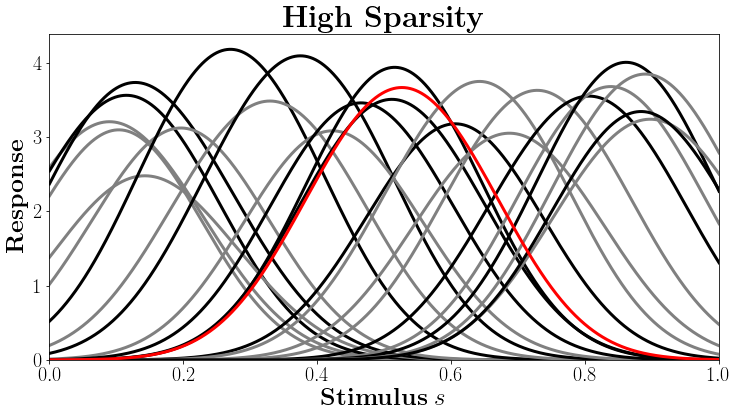

In [7]:
fig, ax = tm1.plot_tuning_curves(linewidth=3)
ax.set_xlim([0, 1])
ax.set_ylim(bottom=0)
ax.set_xlabel(r'\textbf{Stimulus} $s$', fontsize=25)
ax.set_ylabel(r'\textbf{Response}', fontsize=25)
ax.set_title(r'\textbf{High Sparsity}', fontsize=30)
plt.savefig('tuning_curves_high_sparsity.pdf', bbox_inches='tight')
plt.show()

In [8]:
tuning_kwargs, coupling_kwargs, noise_kwargs, stim_kwargs = \
    TriangularModel.generate_kwargs(
        M=20, N=23, K=4,
        tuning_sparsity=0.0, coupling_sparsity=0.5,
        tuning_random_state=2332, coupling_random_state=2332)

In [9]:
tm2 = TriangularModel(
    model='linear',
    parameter_design='basis_functions',
    tuning_kwargs=tuning_kwargs,
    coupling_kwargs=coupling_kwargs,
    noise_kwargs=noise_kwargs,
    stim_kwargs=stim_kwargs)

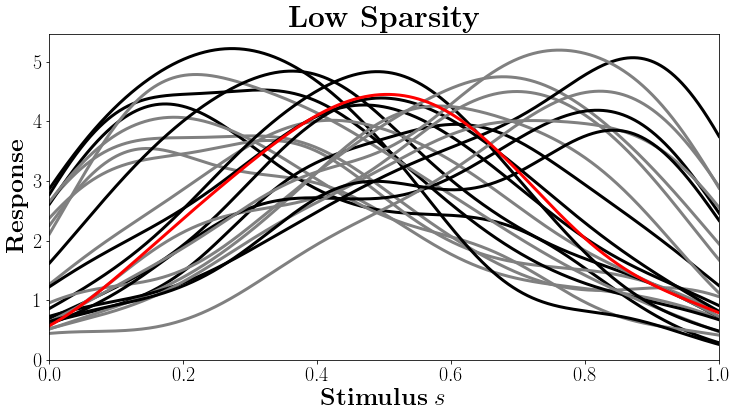

In [10]:
fig, ax = tm2.plot_tuning_curves(linewidth=3)
ax.set_xlim([0, 1])
ax.set_ylim(bottom=0)
ax.set_xlabel(r'\textbf{Stimulus} $s$', fontsize=25)
ax.set_ylabel(r'\textbf{Response}', fontsize=25)
ax.set_title(r'\textbf{Low Sparsity}', fontsize=30)
plt.savefig('tuning_curves_low_sparsity.pdf', bbox_inches='tight')
plt.show()

In [11]:
tuning_kwargs, coupling_kwargs, noise_kwargs, stim_kwargs = \
    TriangularModel.generate_kwargs(
        M=50, N=23, K=4,
        tuning_sparsity=0.75, coupling_sparsity=0.5,
        tuning_random_state=2332, coupling_random_state=2332)

In [12]:
tm3 = TriangularModel(
    model='linear',
    parameter_design='basis_functions',
    tuning_kwargs=tuning_kwargs,
    coupling_kwargs=coupling_kwargs,
    noise_kwargs=noise_kwargs,
    stim_kwargs=stim_kwargs)

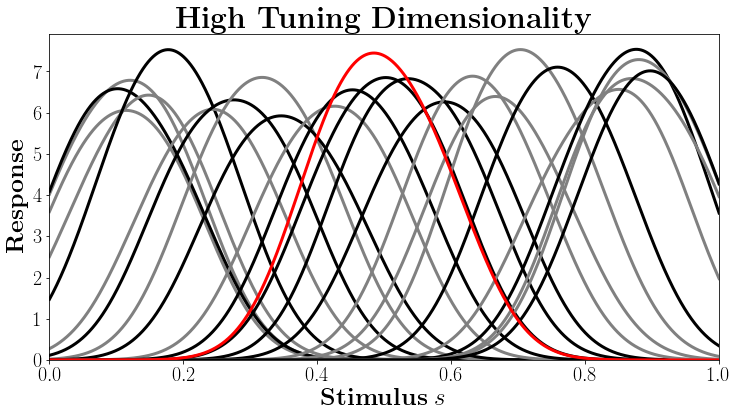

In [13]:
fig, ax = tm3.plot_tuning_curves(linewidth=3)
ax.set_xlim([0, 1])
ax.set_ylim(bottom=0)
ax.set_xlabel(r'\textbf{Stimulus} $s$', fontsize=25)
ax.set_ylabel(r'\textbf{Response}', fontsize=25)
ax.set_title(r'\textbf{High Tuning Dimensionality}', fontsize=30)
plt.show()

# Direct Response

In [26]:
tuning_kwargs, coupling_kwargs, noise_kwargs, stim_kwargs = \
    TriangularModel.generate_kwargs(
        M=20, N=25, K=4,
        tuning_sparsity=0.60, coupling_sparsity=0.5,
        tuning_random_state=2332, coupling_random_state=2332)

In [27]:
tm = TriangularModel(
    model='linear',
    parameter_design='direct_response',
    tuning_kwargs=tuning_kwargs,
    coupling_kwargs=coupling_kwargs,
    noise_kwargs=noise_kwargs,
    stim_kwargs=stim_kwargs)

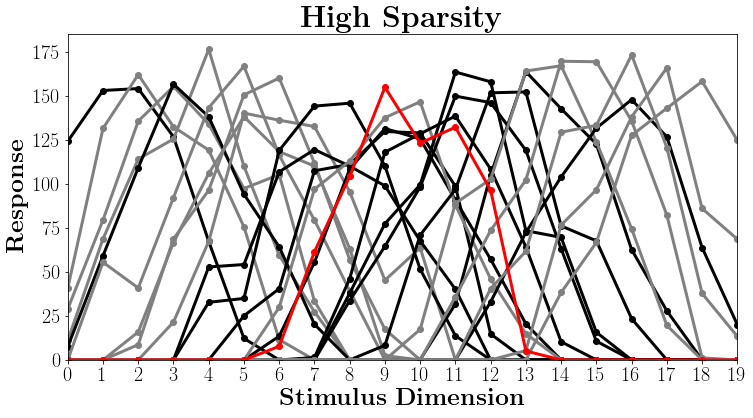

In [32]:
fig, ax = tm.plot_tuning_curves(linewidth=3)
ax.set_xticks(np.arange(tm.M))
ax.set_xlim([0, tm.M - 1])
ax.set_ylim(bottom=0)
ax.set_xlabel(r'\textbf{Stimulus Dimension}', fontsize=25)
ax.set_ylabel(r'\textbf{Response}', fontsize=25)
ax.set_title(r'\textbf{High Sparsity}', fontsize=30)
plt.show()

In [30]:
tuning_kwargs, coupling_kwargs, noise_kwargs, stim_kwargs = \
    TriangularModel.generate_kwargs(
        M=20, N=25, K=4,
        tuning_sparsity=0., coupling_sparsity=0.5,
        tuning_random_state=2332, coupling_random_state=2332)

In [31]:
tm2 = TriangularModel(
    model='linear',
    parameter_design='direct_response',
    tuning_kwargs=tuning_kwargs,
    coupling_kwargs=coupling_kwargs,
    noise_kwargs=noise_kwargs,
    stim_kwargs=stim_kwargs)

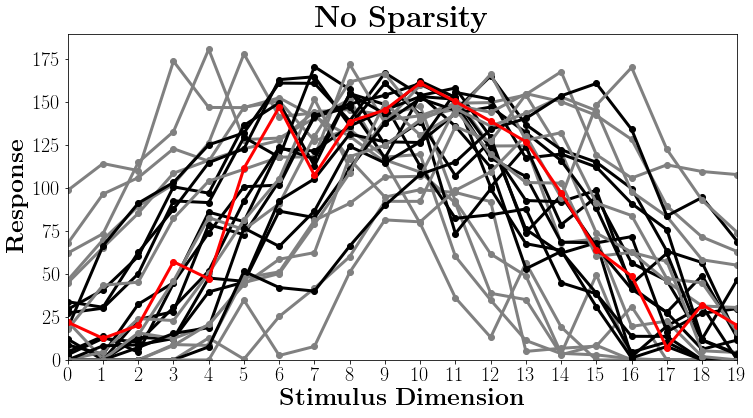

In [33]:
fig, ax = tm2.plot_tuning_curves(linewidth=3)
ax.set_xticks(np.arange(tm2.M))
ax.set_xlim([0, tm2.M - 1])
ax.set_ylim(bottom=0)
ax.set_xlabel(r'\textbf{Stimulus Dimension}', fontsize=25)
ax.set_ylabel(r'\textbf{Response}', fontsize=25)
ax.set_title(r'\textbf{No Sparsity}', fontsize=30)
plt.show()